# Cubic Spline Interpolation

Gegeben: $n+1$ Punkte.

Gesucht: Interpolation mittels kubischen Splines.

In [1]:
# input given points
points = [
(1,0), 
(4,2), 
(7,-5)
]

In [2]:
points = [vector(p) for p in points]
n = len(points) - 1

Berechnen $a_0$ bis $a_{n+1}$

$$a_i = y_i$$



In [3]:
a = [p[1] for p in points]
a

[0, 2, -5]

Berechnen $h_0$ bis $h_{n}$

$$h_i = x_{i+1} - x_i$$

In [4]:
h = [points[i+1][0] - points[i][0] for i in range(n)]
h

[3, 3]

Anlegen der Matrix $A \in M(n \times n)$

In [5]:
A = matrix([[1, 0, 0],
            [h[0], 2*(h[0] + h[1]), h[1]],
            [0, 0, 1]])
A

[ 1  0  0]
[ 3 12  3]
[ 0  0  1]

und des Vektors $\bar{b}$

In [6]:
bv = vector([0, (3/h[1])*(a[2]-a[1])- (3/h[0])*(a[1]-a[0]), 0])
bv

(0, -9, 0)

In [7]:
A^-1

[   1    0    0]
[-1/4 1/12 -1/4]
[   0    0    1]

Lösung von $A c = \bar{b}$ ergibt $c = \{c_0, c_1, \ldots, c_n\}$

In [8]:
c = list(A^-1 * bv)
c

[0, -3/4, 0]

$$b_i = \frac{1}{h_i}(a_{i+1} - a_i) - \frac{h_i}{3}(2 c_i + c_{i+1})$$

In [9]:
b = [ 1/h[i] * (a[i+1]-a[i]) - h[i]/3*(2*c[i]+c[i+1]) for i in range(len(points)-1)];b

[17/12, -5/6]

$$d_i = \frac{c_{i+1} - c_i}{3 h_i}$$

In [10]:
d = [(c[i+1]-c[i])/(3*h[i]) for i in range(len(points)-1)];d

[-1/12, 1/12]

In [11]:
print 'a =', a
print 'b =', b
print 'c =', c
print 'd =', d
print 'h =', h

a = [0, 2, -5]
b = [17/12, -5/6]
c = [0, -3/4, 0]
d = [-1/12, 1/12]
h = [3, 3]


In [12]:
# all the splines
var('x')
S = [ a[i] + b[i]*(x-points[i][0]) + c[i]*(x-points[i][0])^2 + d[i]*(x-points[i][0])^3 for i in range(len(points)-1)]
for i, s in enumerate(S):
    print "S_{} = ".format(i), s

S_0 =  -1/12*(x - 1)^3 + 17/12*x - 17/12
S_1 =  1/12*(x - 4)^3 - 3/4*(x - 4)^2 - 5/6*x + 16/3


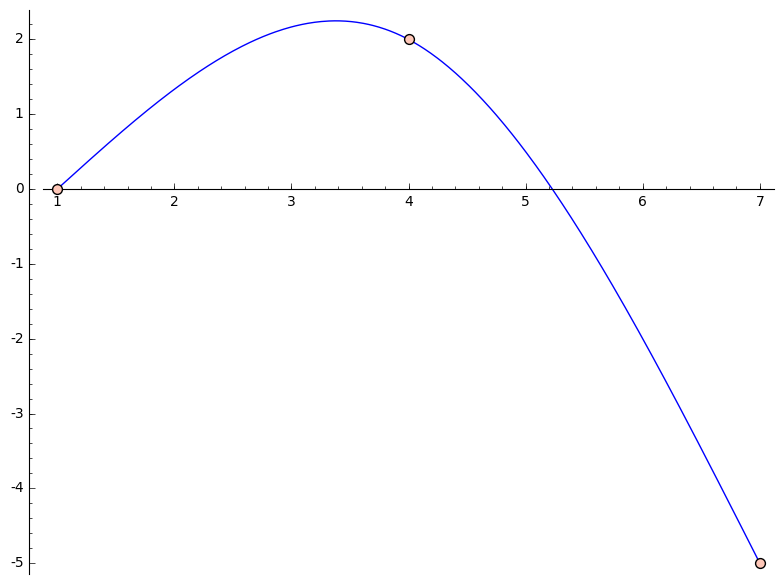

In [13]:
# plot the points and the splines for their interval
scatter_plot(points) + sum([ plot(s, xmin=points[i][0], xmax=points[i+1][0]) for i, s in enumerate(S)])